# import modules

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# users, movies, ratings 파일에서 기본적인 데이터 전처리

In [193]:
users = pd.read_csv("C:/Users/admin/Desktop/ml-1m/users.dat", delimiter="::", engine = 'python', header=None)
users
# 1: 순서, F: 성별, 1.1: 나이(under18, 18~24, 25~34, 35~44, 45, 49, 50~55, 56+), 10: 직업(0~20), zip-code

users.columns = ["userID", "gender", "age", "occupation", "zip-code"]
age = {1: "under 18", 18: "18-24", 25: "25-34", 35: "35-44", 45: "45-49", 50: "50-55", 56: "56+"}
occupation = {0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student", 5: "customer service", 
             6: "doctor/health care", 7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired",
             14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftman", 19: "unemployed", 20:"writer"}
#나이와 직업을 다시 설정

users = users.replace({'age': age})
users = users.replace({'occupation': occupation})
users.info()
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userID      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   object
 3   occupation  6040 non-null   object
 4   zip-code    6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


,userID,gender,age,occupation,zip-code
0,1,F,under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603
6036,6037,F,45-49,academic/educator,76006
6037,6038,F,56+,academic/educator,14706
6038,6039,F,45-49,other or not specified,01060


In [194]:
movies = pd.read_csv("C:/Users/admin/Desktop/ml-1m/movies.dat", delimiter="::", engine = 'python', encoding = 'ISO-8859-1', header=None)
movies.columns = ['movieID', 'title', 'genres']
year = movies['title'].apply(lambda x: x[-5: -1])
movies['year'] = year
movies['year'] = movies['year'].apply(pd.to_numeric)
movies.info()
movies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieID  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
 3   year     3883 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 121.5+ KB


,movieID,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [195]:
ratings = pd.read_csv("C:/Users/admin/Desktop/ml-1m/ratings.dat", delimiter="::", engine = 'python', encoding = 'ISO-8859-1', header=None)
# 1: userID, 1193: movieID, 5: ratings, 978300760: timestamp
ratings.columns = ['userID', 'movieID', 'ratings', 'timestamp']
ratings.info()
ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userID     1000209 non-null  int64
 1   movieID    1000209 non-null  int64
 2   ratings    1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


,userID,movieID,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


# 장르별, 연도별, 나이별, 성별, 직업별에 따른 그래프 시각화

In [196]:
genres = []

for genre in movies['genres']:
    for i in genre.split('|'):
        genres.append(i)
        
count = Counter(genres)
dic_count = count
sorted_dic1 = sorted(dic_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_dic1)         #아이템 값을 제일 많은 장르 순위로 내림차순 정렬

[('Drama', 1603), ('Comedy', 1200), ('Action', 503), ('Thriller', 492), ('Romance', 471), ('Horror', 343), ('Adventure', 283), ('Sci-Fi', 276), ("Children's", 251), ('Crime', 211), ('War', 143), ('Documentary', 127), ('Musical', 114), ('Mystery', 106), ('Animation', 105), ('Fantasy', 68), ('Western', 68), ('Film-Noir', 44)]


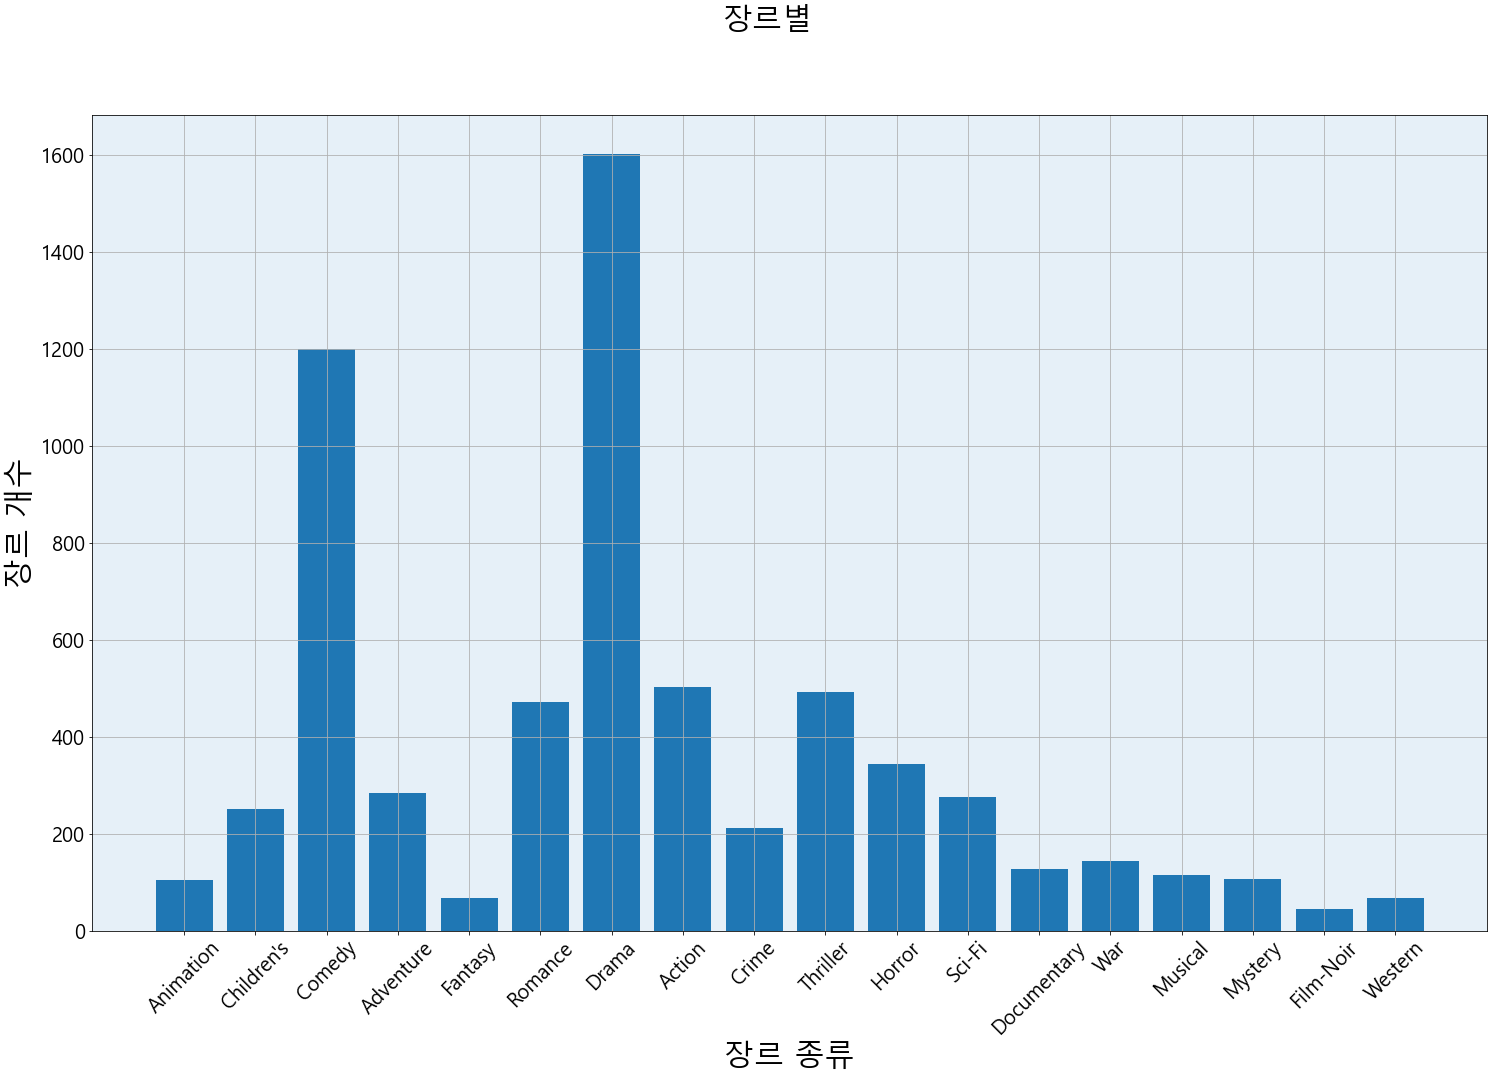

In [197]:
plt.rcParams['axes.facecolor'] = '#E6F0F8'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 12
fig = plt.figure()
plt.rc('font', family='Malgun Gothic')
fig.suptitle('장르별', fontsize=30)
plt.bar(dic_count.keys(), dic_count.values())
plt.xlabel('장르 종류', fontsize=30)
plt.ylabel('장르 개수', fontsize=30)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [201]:
ages = users.age.value_counts().sort_index()
new_ages = pd.DataFrame(ages, index = ages.index)
new_ages.columns = ['count']
new_ages

,count
18-24,1103
25-34,2096
35-44,1193
45-49,550
50-55,496
56+,380
under 18,222


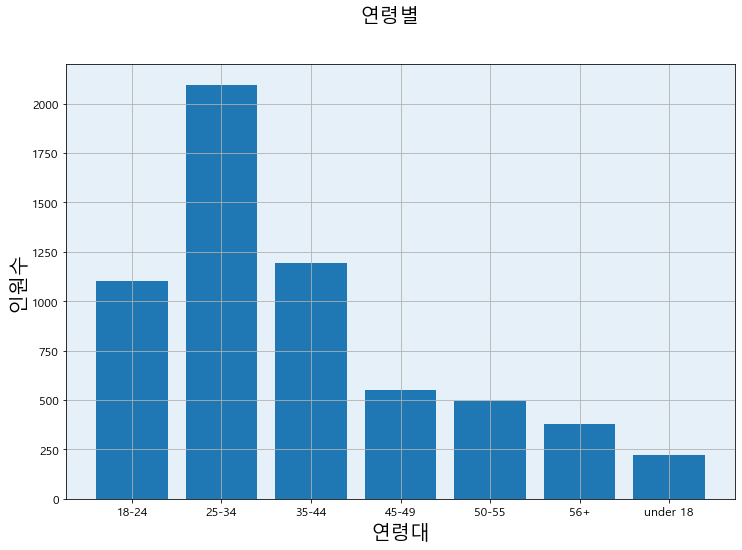

In [212]:
plt.rcParams['axes.facecolor'] = '#E6F0F8'
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['font.size'] = 12
fig = plt.figure()
plt.rc('font', family='Malgun Gothic')
fig.suptitle('연령별', fontsize=20)
plt.bar(new_ages.index, new_ages['count'].values)
plt.xlabel('연령대', fontsize=20)
plt.ylabel('인원수', fontsize=20)
# plt.xticks(rotation=45, fontsize=20)
# plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [215]:
genders = users.gender.value_counts()
new_genders = pd.DataFrame(genders, index = genders.index)
new_genders.columns = ['count']
new_genders

,count
M,4331
F,1709


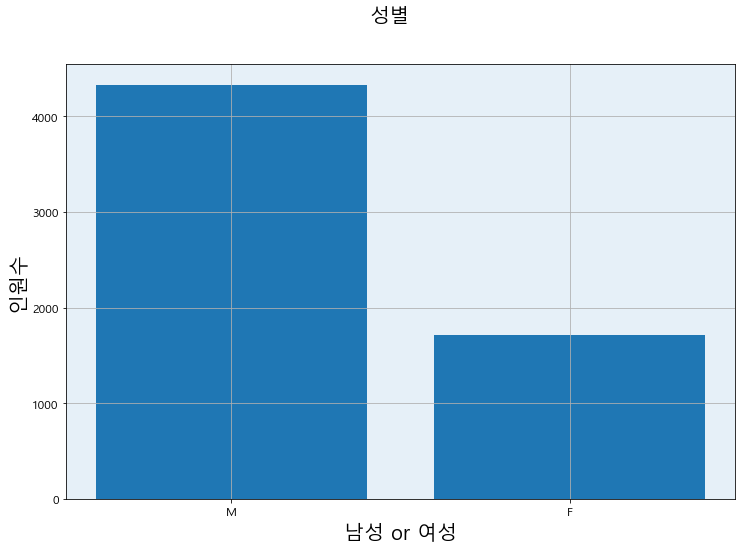

In [217]:
plt.rcParams['axes.facecolor'] = '#E6F0F8'
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['font.size'] = 12
fig = plt.figure()
plt.rc('font', family='Malgun Gothic')
fig.suptitle('성별', fontsize=20)
plt.bar(new_genders.index, new_genders['count'].values)
plt.xlabel('남성 or 여성', fontsize=20)
plt.ylabel('인원수', fontsize=20)
# plt.xticks(rotation=45, fontsize=20)
# plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

In [237]:
users

,userID,gender,age,occupation,zip-code
0,1,F,under 18,K-12 student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,02460
4,5,M,25-34,writer,55455
...,...,...,...,...,...
6035,6036,F,25-34,scientist,32603
6036,6037,F,45-49,academic/educator,76006
6037,6038,F,56+,academic/educator,14706
6038,6039,F,45-49,other or not specified,01060


In [238]:
ratings

,userID,movieID,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [240]:
movies

,movieID,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [283]:
u_r = pd.merge(users, ratings, on = 'userID')
u_r

data = pd.merge(u_r, movies, on = 'movieID')
data.drop(['zip-code'], axis=1, inplace=True)
data.drop(['timestamp'], axis=1, inplace=True)
M = data['gender'] == 'M'
F = data['gender'] == 'F'
data

,userID,gender,age,occupation,movieID,ratings,title,genres,year
0,1,F,under 18,K-12 student,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975
1,2,M,56+,self-employed,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975
2,12,M,25-34,programmer,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,1975
3,15,M,25-34,executive/managerial,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,1975
4,17,M,50-55,academic/educator,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18-24,technician/engineer,2198,5,Modulations (1998),Documentary,1998
1000205,5675,M,35-44,sales/marketing,2703,3,Broken Vessels (1998),Drama,1998
1000206,5780,M,18-24,technician/engineer,2845,1,White Boys (1999),Drama,1999
1000207,5851,F,18-24,writer,3607,5,One Little Indian (1973),Comedy|Drama|Western,1973


In [298]:
male_rating = data[M]
male_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753769 entries, 1 to 1000208
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userID      753769 non-null  int64 
 1   gender      753769 non-null  object
 2   age         753769 non-null  object
 3   occupation  753769 non-null  object
 4   movieID     753769 non-null  int64 
 5   ratings     753769 non-null  int64 
 6   title       753769 non-null  object
 7   genres      753769 non-null  object
 8   year        753769 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 57.5+ MB


In [293]:
female_rating = data[F]
female_rating

,userID,gender,age,occupation,movieID,ratings,title,genres,year
0,1,F,under 18,K-12 student,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975
5,18,F,18-24,clerical/admin,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,1975
7,24,F,25-34,executive/managerial,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,1975
8,28,F,25-34,academic/educator,1193,3,One Flew Over the Cuckoo's Nest (1975),Drama,1975
19,59,F,50-55,academic/educator,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama,1975
...,...,...,...,...,...,...,...,...,...
1000199,5334,F,56+,retired,3382,5,Song of Freedom (1936),Drama,1936
1000200,5420,F,under 18,unemployed,1843,3,Slappy and the Stinkers (1998),Children's|Comedy,1998
1000201,5433,F,35-44,technician/engineer,286,3,Nemesis 2: Nebula (1995),Action|Sci-Fi|Thriller,1995
1000202,5494,F,35-44,technician/engineer,3530,4,Smoking/No Smoking (1993),Comedy,1993


In [303]:
m_rating = male_rating.groupby('title', as_index=False)['ratings'].agg(['count', 'mean']).reset_index()
m_rating

,title,count,mean
0,"$1,000,000 Duck (1971)",21,2.761905
1,'Night Mother (1986),34,3.352941
2,'Til There Was You (1997),15,2.733333
3,"'burbs, The (1989)",211,2.962085
4,...And Justice for All (1979),164,3.689024
...,...,...,...
3666,"Zed & Two Noughts, A (1985)",21,3.380952
3667,Zero Effect (1998),242,3.723140
3668,Zero Kelvin (Kjærlighetens kjøtere) (1995),2,3.500000
3669,Zeus and Roxanne (1997),14,2.357143


In [304]:
f_rating = female_rating.groupby('title', as_index=False)['ratings'].agg(['count', 'mean']).reset_index()
f_rating

,title,count,mean
0,"$1,000,000 Duck (1971)",16,3.375000
1,'Night Mother (1986),36,3.388889
2,'Til There Was You (1997),37,2.675676
3,"'burbs, The (1989)",92,2.793478
4,...And Justice for All (1979),35,3.828571
...,...,...,...
3476,Your Friends and Neighbors (1998),27,2.888889
3477,"Zed & Two Noughts, A (1985)",8,3.500000
3478,Zero Effect (1998),59,3.864407
3479,Zeus and Roxanne (1997),9,2.777778


In [313]:
mf_rating = pd.merge(m_rating, f_rating, on = 'title')
mf_rating.columns = ['title', 'count_m', 'mean_m', 'count_f', 'mean_f']
mf_rating

,title,count_m,mean_m,count_f,mean_f
0,"$1,000,000 Duck (1971)",21,2.761905,16,3.375000
1,'Night Mother (1986),34,3.352941,36,3.388889
2,'Til There Was You (1997),15,2.733333,37,2.675676
3,"'burbs, The (1989)",211,2.962085,92,2.793478
4,...And Justice for All (1979),164,3.689024,35,3.828571
...,...,...,...,...,...
3441,Your Friends and Neighbors (1998),82,3.536585,27,2.888889
3442,"Zed & Two Noughts, A (1985)",21,3.380952,8,3.500000
3443,Zero Effect (1998),242,3.723140,59,3.864407
3444,Zeus and Roxanne (1997),14,2.357143,9,2.777778


In [323]:
occup = pd.merge(ratings[['userID', 'movieID', 'ratings']], users[['userID', 'occupation']], on = 'userID')
occup.drop(['userID'], axis=1, inplace=True)

occup_movie = pd.merge(occup[['movieID', 'ratings', 'occupation']], movies[['movieID', 'title']], on = 'movieID')
occup_movie

occup_movie = occup_movie.groupby('occupation', as_index=False)['ratings'].agg([])

ValueError: no results